## 📊 **Total Distance Calculation from Accelerometer Data (EventID)**

This notebook processes raw accelerometer data from the **Open Seizure Database (OSDB)** using **distance calculation** to visualize movement over time for a specific event. The event selected for analysis is identified by **`EventID`**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import json

# Load the JSON file
file_path = '../../tests/testData/testDataVisualisation.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    raw_json = json.load(file)

In [2]:
# Flatten the JSON and extract relevant fields
flattened_data = []

for attribute in raw_json:
    user_id = attribute.get('userId', None)
    datapoints = attribute.get('datapoints', [])

    for point in datapoints:
        event_id = point.get('eventId', None)
        hr = point.get('hr', [])
        o2Sat = point.get('o2Sat', [])
        rawData = point.get('rawData', [])
        rawData3D = point.get('rawData3D', [])
        # Append every datapoint as a row
        flattened_data.append({
            'eventId': event_id,
            'userId': user_id,
            'hr': hr,
            'o2Sat': o2Sat,
            'rawData': rawData,
            'rawData3D': rawData3D,

        })
        
# Create a DataFrame
df_sensordata = pd.DataFrame(flattened_data)

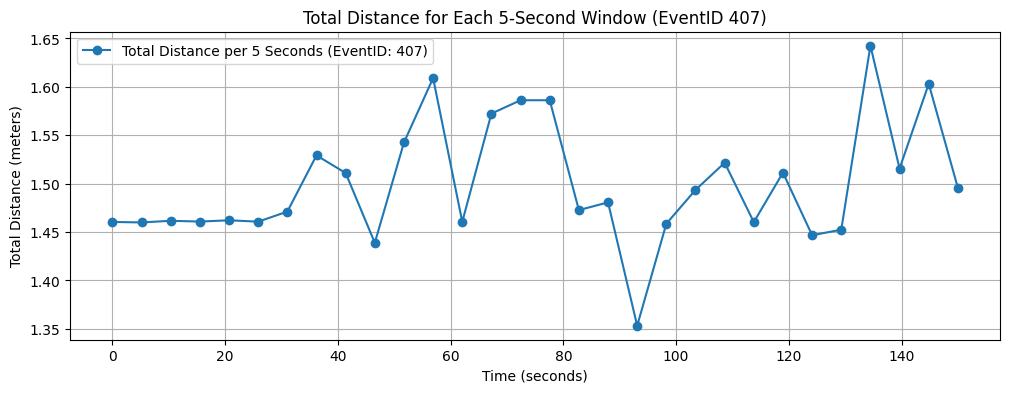

In [3]:
# Filter rows for eventId 407
event_id = 407
filtered_data = df_sensordata[df_sensordata['eventId'] == event_id]

# Total number of rows for the event
num_rows = len(filtered_data)

# Calculate total time (in seconds)
total_time = num_rows * 5

# Define sampling rate (25 Hz as mentioned earlier)
sampling_rate = 25

# Initialize an empty list to store total distances
total_distances = []

# Loop through each row and calculate the total distance for the 5-second window
for index, row in filtered_data.iterrows():
    # Get the rawData list and convert it to a numpy array
    raw_data = np.array(row['rawData'])  # This is a list of accelerations in milli-g
    
    # Convert from milli-g to m/s^2 (milli-g * 9.81 / 1000)
    raw_data_m_s2 = raw_data * (9.81 / 1000)
    
    # Calculate time step (1 / sampling rate)
    time_step = 1 / sampling_rate
    
    # Calculate distance traveled for each timestep: d = 0.5 * a * t^2
    # We square the time step and multiply by 0.5 times the acceleration
    distance_traveled = 0.5 * raw_data_m_s2 * time_step**2
    
    # Sum the distances for the entire 5-second window
    total_distance = np.sum(np.abs(distance_traveled))  # Absolute value to account for movement in any direction
    
    # Append the total distance to the list
    total_distances.append(total_distance)

# Convert the total_distances list to a NumPy array
total_distances = np.array(total_distances)

# Generate x-axis points (5 seconds per row)
time_points = np.linspace(0, total_time, num_rows)

# Plot total distance per timestep
plt.figure(figsize=(12, 4))
plt.plot(time_points, total_distances, marker='o', label=f"Total Distance per 5 Seconds (EventID: {event_id})", color='tab:blue')

# Add labels and title
plt.title(f"Total Distance for Each 5-Second Window (EventID {event_id})")
plt.xlabel("Time (seconds)")
plt.ylabel("Total Distance (meters)")
plt.legend()
plt.grid()

# Display the plot
plt.show()


## 📝 **Workflow**

### 1. **📂 Loading and Flattening Data**
   - The raw data is loaded from a **JSON** file, which contains sensor readings from accelerometers.
   - Key fields such as **`userId`**, **`eventId`**, **`hr`** (heart rate), **`o2Sat`** (oxygen saturation), **`rawData`**, and **`rawData3D`** are extracted.
   - Each data point is flattened into a tabular format for analysis.

### 2. **🔄 Creating the DataFrame**
   - The **flattened data** is stored in a **Pandas DataFrame**, facilitating easy filtering and processing.
   - The DataFrame includes sensor readings and is used to isolate data from a specific **event**.

### 3. **🔍 Filtering for Specific Event**
   - The dataset is filtered to focus on **`EventID 407`**, isolating data specific to this event for further analysis.

### 4. **⏱️ Calculating Time and Distance**
   - The time for each 5-second window is calculated, considering the **sampling rate** of 25 Hz.
   - The **acceleration data** is converted from **milli-g** to **m/s²**, and the total **distance traveled** during each 5-second window is computed using the equation:  
     \[ \text{Distance} = 0.5 \times a \times t^2 \]
   - The **total distance** for each window is the sum of all individual distance calculations.

### 5. **📈 Plotting Total Distance**
   - The **total distance** traveled during each 5-second window is plotted over time, showing how the movement evolves throughout the event.
   - The **x-axis** represents time (in seconds), while the **y-axis** shows the **total distance** (in meters).

### 6. **📊 Final Output**
   - The plot visualizes the total distance for each 5-second window of the event, offering insights into the dynamics of movement over time.

---

## 👤 **Author**  
Developed by **Jamie Pordoy**.
